### Sneha Rane

# Prediction using Unsupervised ML
## K- Means Clustering

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

![species.png](https://miro.medium.com/max/2550/1*7bnLKsChXq94QjtAiRn40w.png)

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Load the iris dataset

iris_df = pd.read_csv('Iris.csv')
# iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Label Encoding

In [4]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
iris_df['Species']= label_encoder.fit_transform(iris_df['Species']) 

iris_df['Species'].unique()

array([0, 1, 2])

### Donut Chart

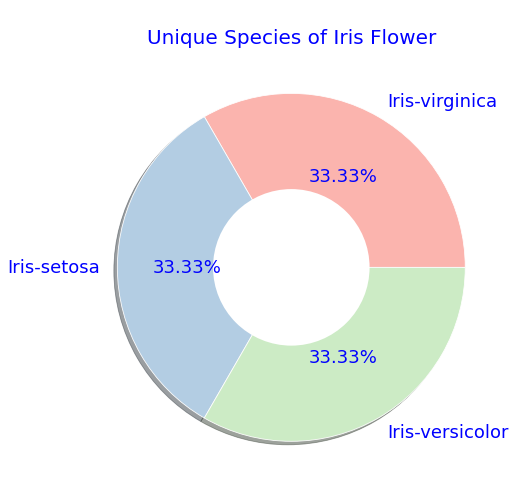

In [6]:
from palettable.colorbrewer.qualitative import Pastel1_9

plt.figure(figsize=(16,8))

df_ref=iris_df.Species.value_counts()

plt.pie(df_ref,  labels=['Iris-virginica','Iris-setosa', 'Iris-versicolor'],colors=Pastel1_9.hex_colors, autopct='%0.2f%%',
        shadow=True,
        wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' })

plt.rcParams['text.color'] = 'Blue'
plt.rcParams['font.size'] = 18.0

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.45, fc='white',linewidth=0.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('\nUnique Species of Iris Flower',fontsize=20)

plt.show()

In [7]:
iris_df.drop(['Id', 'Species'] ,axis=1, inplace=True)
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris_df.shape

(150, 4)

## Finding the optimum number of clusters for k-means classification
Determine the value of K

## Elbow Mothod

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.<br>
The <b>Elbow Method</b> is one of the most popular methods to determine this optimal value of k.<br><br>

We now define the following:-<br>

1. <b>Distortion :</b> It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
2. <b>Inertia :</b> It is the sum of squared distances of samples to their closest cluster center.<br>
We iterate the values of k from 1 to 100 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

### Building the clustering model and calculating the values of the Inertia

In [9]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
x 

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

inertias = []
distortions=[]
mapping1 = {} 
k = range(1,11) 

for i in k:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    mapping1[k] = sum(np.min(cdist(x, kmeans.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    inertias.append(kmeans.inertia_)

## Visualizing the results Using the different values of Distortions

In [10]:
# distortions values
print('10 values of distortions:')
distortions

10 values of distortions:


[1.943034159037026,
 0.856027968244863,
 0.648839494895334,
 0.5585746563385618,
 0.5104611995137194,
 0.4663874794297156,
 0.43480292754684363,
 0.4114420911082941,
 0.3949582353369552,
 0.3803382460002539]

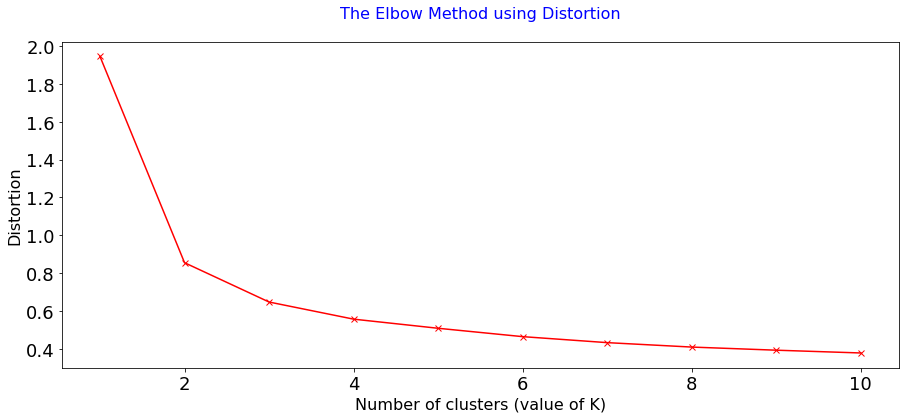

In [13]:
# allowing us to observe 'The elbow' on line graph

fig = plt.figure(figsize = (15, 6))

plt.plot(k, distortions, 'rx-') 
plt.xlabel('Number of clusters (value of K)', fontsize=16) 
plt.ylabel('Distortion', fontsize=16) 
plt.title('The Elbow Method using Distortion\n', fontsize=16) 
plt.show() 

## Visualizing the results Using the different values of Inertia

In [14]:
# inertia values
print('10 values of inertia:')
inertias 

10 values of inertia:


[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

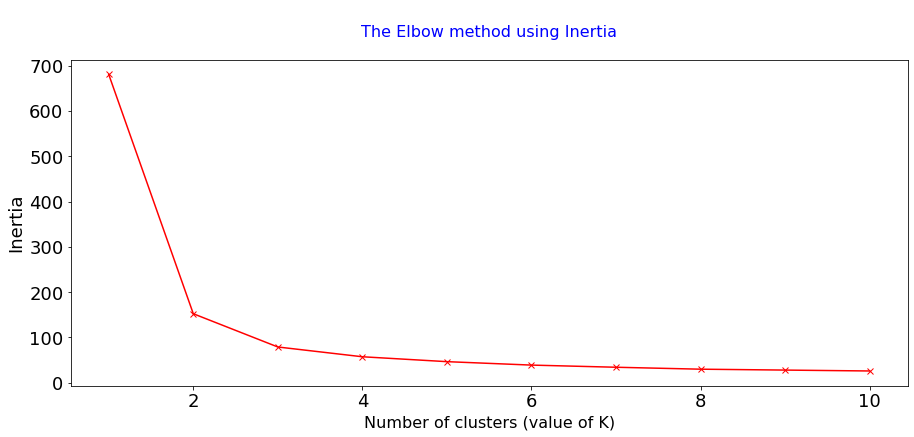

In [15]:
# allowing us to observe 'The elbow' on line graph

fig = plt.figure(figsize = (15, 6))

plt.plot(k, inertias,'rx-')
plt.rcParams['font.size'] = 10.0

plt.title('\nThe Elbow method using Inertia\n', fontsize=16)
plt.xlabel('Number of clusters (value of K)', fontsize=16)
plt.ylabel('Inertia', fontsize=18) # Within cluster sum of squares (wcss)
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

## Applying kmeans to the dataset / Creating the kmeans classifier

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualising the clusters - On the first two columns

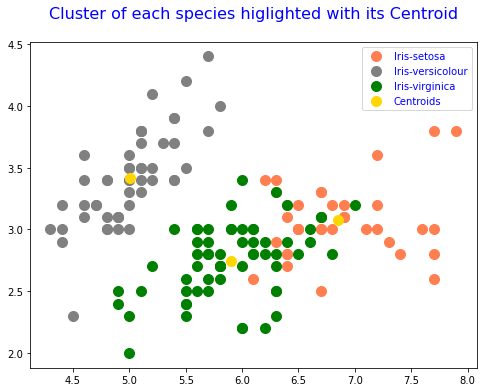

In [17]:
fig = plt.figure(figsize = (8, 6))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'coral', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'grey', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'gold', label = 'Centroids')

plt.title('Cluster of each species higlighted with its Centroid\n', fontsize=16)

plt.legend()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the <b>optimal number of clusters for the data is 3</b>.